# Linear Regression (Beta Estimates)
## Intuition
For the past 10 years, I've taken at least a dozen classes that use linear regression as a core statistical technique to explain relationships between things. However, I've had to go back and re-teach myself what a lienar regression *really* is almost every time I have a new class. This notebook is a refernence that explains the core motivation, math, and data that makes up a linear model.

The idea behind a linear regression is simple. It's that we can represent a relationhsip between some given number of inputs and and one output with a *line*.

## Explanation

We have a relationship where $y$ seems to change with $x$, but it's not perfect. There is some kind of **randomness**. Now, the crux of a linear regression is that we assume the randomness is just that - random. By making this assumption, we are making the case that (1) we think $x$ causes $y$ and (2) any deviation that $y$ may have from our prediction is just random chance.

What's important to note, is this relationship is *approximate* so that means we will have some errors. We're assuming some kind of linear form for this problem. In our case, it's reasonable.

It's also worth stating again, we want to make the assumption of a linear relationship becuase its (1) simple, and (2) powerful. If the relationship is linear, we can not only make predictions of $y$, but we can infer how much $x$ affects $y$. So we can make an estimate of strength.

We make this estimation by minimizing the residual distance between our estimates and the real values

**Linear Form**
$$
RSS = \sum(Y - \hat{Y})^2
$$

**Matrix Form**
$$
\begin{aligned}
RSS &= (Y - \hat{Y})^T(Y - \hat{Y}) \\
RSS &= (Y - X \beta )^T(Y - X \beta )
\end{aligned}
$$

**Take Derivative**
$$
\begin{aligned}
\nabla_\beta 
    &= (Y - \hat{Y})^T(Y - \hat{Y}) \\
0   &= (Y - X \beta )^T(Y - X \beta ) \\
    &= 2(Y - X \beta )^T(-X) \\
    &= XY - X^TX\beta \\
X^TX\beta    
    &= X^TY \\
\beta    
    &= (X^TX)^{-1}X^TY
\end{aligned}
$$

We can think of this as a linear combination of each $X$ value, which is roughly the variance-covariance matrix inverse multiplied by the $X$ $Y$ variance-covariance matrix which. This makes our estimates for $\beta$.

## Example
Let's start with generating random data. First let's import the necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### True functional form
Let's first generate some *observational* data with the true functional form

$$
y_i = 3 + 0.5 x_i + \epsilon_i
$$

In [9]:
np.random.seed(100)

# Generate X values
X1 = np.array(range(100))
X0 = np.ones(X1.shape)
X = np.vstack([X0, X1]).T

# True beta values
true_betas = [3, 0.5]

# Estimate Y
y = X @ true_betas + np.random.randn(100) * 4

And let's plot our $y$ and $X$ to observe our functional form.

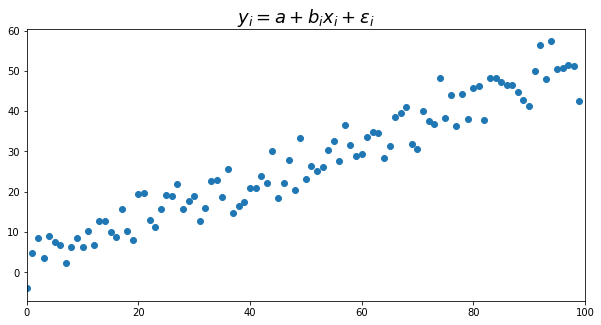

In [8]:
# Plot
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(X1, y, marker='o', linestyle='none')
ax.set_xlim(0,100)
ax.set_title('$y_i = a + b_ix_i + \epsilon_i$', fontsize=18)
plt.show()

Now, we can use our $\beta$ estimator to see if we can recreate our true betas from our estimate. 

In [4]:
# create \beta estimates
betas = np.linalg.inv(X.T @ X) @ X.T @ y

for i, b in enumerate(betas):
    print(f"Beta_{i} Estimate:\t{round(b, 4)}")

Beta_0 Estimate:	3.0548
Beta_1 Estimate:	0.4905


This means, our estimated equation has this functional form:

$$
\hat{y}_i = 3.05 + 0.49 x_i + \epsilon_i
$$

We can now plot our observational data, our estimated line of best fit, and the true line

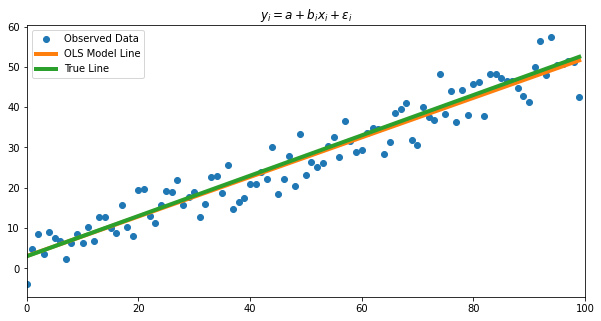

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

# Plot lines
ax.plot(X1, y, marker='o', linestyle='none', label='Observed Data')
ax.plot(X1, X @ betas, linewidth='4', label='OLS Model Line')
ax.plot(X1, X @ true_betas, linewidth='4', label='True Line')

# Show plots
ax.set_title('$y_i = a + b_ix_i + \epsilon_i$')
ax.set_xlim(0,100)
plt.legend()
plt.show()